# Import libraries

In [25]:
!pip install keras-ocr tensorflow==2.12.0
!pip install numpy matplotlib

In [26]:
import pandas as pd
import numpy as np

from glob import glob
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
from PIL import Image

import keras_ocr
import easyocr

# Load the annotation data from CSV and image data from parquet

In [27]:
annot = pd.read_csv('/kaggle/input/textocr-text-extraction-from-images-dataset/annot.csv')
imgs = pd.read_parquet('/kaggle/input/textocr-text-extraction-from-images-dataset/img.parquet')

# Load image paths
# Use glob to find all image files in the specified directory
images = glob('/kaggle/input/textocr-text-extraction-from-images-dataset/train_val_images/train_images/*.jpg')  # Corrected to include *.jpg


# Display first few rows of the annotations and images data

In [28]:
print("Annotations Data:")
print(annot.head())

Annotations Data:
   Unnamed: 0                  id          image_id  \
0           0  a4ea732cd3d5948a_1  a4ea732cd3d5948a   
1           1  a4ea732cd3d5948a_2  a4ea732cd3d5948a   
2           2  a4ea732cd3d5948a_3  a4ea732cd3d5948a   
3           3  a4ea732cd3d5948a_4  a4ea732cd3d5948a   
4           4  a4ea732cd3d5948a_5  a4ea732cd3d5948a   

                            bbox  utf8_string  \
0   [525.83, 3.4, 197.64, 33.94]  Performance   
1  [534.67, 64.68, 91.22, 38.19]        Sport   
2  [626.95, 63.62, 96.52, 31.82]        Watch   
3  [577.4, 141.87, 147.13, 43.1]   ...period.   
4  [391.03, 163.9, 60.82, 38.65]            .   

                                              points     area  
0  [525.83, 3.4, 723.47, 7.29, 722.76, 36.99, 525...  6707.90  
1  [535.73, 64.68, 623.41, 67.51, 625.89, 102.87,...  3483.69  
2  [626.95, 63.62, 721.7, 63.62, 723.47, 95.44, 6...  3071.27  
3  [580.02, 143.61, 724.53, 141.87, 723.66, 184.9...  6341.30  
4  [395.2, 163.9, 451.85, 191.94, 44

In [29]:
print("\nImages Data:")
print(imgs.head())


Images Data:
                 id  width  height    set                   file_name
0  a4ea732cd3d5948a    840    1024  train  train/a4ea732cd3d5948a.jpg
1  4bf43a7b2a898044   1024     683  train  train/4bf43a7b2a898044.jpg
2  1b55b309b0f50d02   1024     683  train  train/1b55b309b0f50d02.jpg
3  00c359f294f7dcd9   1024     680  train  train/00c359f294f7dcd9.jpg
4  04b5a37f762b0f51    768    1024  train  train/04b5a37f762b0f51.jpg


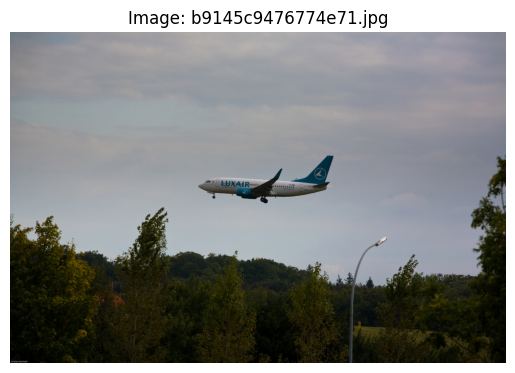

In [30]:
# Visualize the any image with their corresponding annotations

img_path = images[29]  # Get the image path
image = Image.open(img_path)  # Open the image
plt.imshow(image)  # Display the image
plt.axis('off')  # Hide axes
plt.title(f"Image: {img_path.split('/')[-1]}")  # Title as the image name
plt.show()

In [31]:
image_id = images[29].split('/')[-1].split('.')[0] 
annot.query('image_id == @image_id')

Unnamed: 0                  id          image_id  \
118112      118112  b9145c9476774e71_1  b9145c9476774e71   
118113      118113  b9145c9476774e71_2  b9145c9476774e71   
118114      118114  b9145c9476774e71_3  b9145c9476774e71   
118115      118115  b9145c9476774e71_4  b9145c9476774e71   
118116      118116  b9145c9476774e71_5  b9145c9476774e71   

                                  bbox utf8_string  \
118112  [435.18, 304.27, 60.17, 17.07]      LUXAIR   
118113     [606.23, 314.95, 16.7, 5.5]           .   
118114      [562.79, 322.18, 8.7, 2.8]           .   
118115     [571.59, 322.68, 10.8, 2.7]           .   
118116      [582.59, 323.28, 4.3, 2.8]           .   

                                                   points     area  
118112  [435.18, 304.27, 494.86, 306.38, 495.35, 321.3...  1027.10  
118113  [606.23, 314.95, 622.93, 315.25, 622.93, 320.0...    91.85  
118114  [562.79, 322.28, 571.49, 322.18, 571.29, 324.9...    24.36  
118115  [571.69, 322.78, 582.39, 322.68, 582.19, 325.3...    29.16  
118116  [582.59, 323.38, 586.29, 323.28, 586.89, 326.0...    12.04

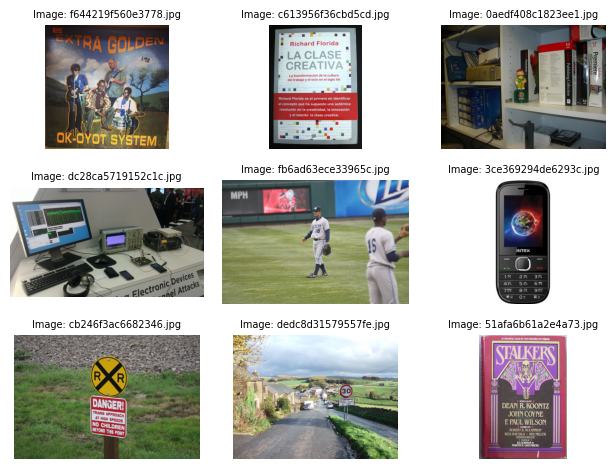

In [39]:
# Display the images
for i in range(9):  
    img_path = images[i]  # Get the image path
    image = Image.open(img_path)  # Open the image
    
    plt.subplot(3, 3, i + 1)  # Create a subplot in a 3x3 grid
    plt.imshow(image)  # Display the image
    plt.axis('off')  # Hide axes
    plt.title(f"Image: {img_path.split('/')[-1]}",fontsize=7)  # Title as the image name

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## EasyOCR for text extraction & recognition

In [40]:
reader = easyocr.Reader(['en'], gpu=True)  # EasyOCR

In [41]:
# Function to process EasyOCR results
def get_easyocr_results(image_paths):
    dfs = []
    for img in tqdm(image_paths):
        result = reader.readtext(img)
        img_id = img.split('/')[-1].split('.')[0]
        img_df = pd.DataFrame(result, columns=['bbox', 'text', 'conf'])
        img_df['img_id'] = img_id
        dfs.append(img_df)
    return pd.concat(dfs)


In [50]:
# Get results for EasyOCR 
easyocr_df = get_easyocr_results(images[:10])  # Use first few images for EasyOCR

  0%|          | 0/10 [00:00<?, ?it/s]

In [58]:
def plot_easyocr(img_fn, easyocr_df):
    img_id = img_fn.split('/')[-1].split('.')[0]  # Extract image ID
    fig, ax = plt.subplots(figsize=(4, 4))

    # Get EasyOCR results for the current image
    easy_results = easyocr_df.query('img_id == @img_id')[['text', 'bbox']].values.tolist()
    easy_results = [(x[0], np.array(x[1])) for x in easy_results]

    # Visualize EasyOCR results
    keras_ocr.tools.drawAnnotations(plt.imread(img_fn), easy_results, ax=ax)
    ax.set_title('EasyOCR Results', fontsize=18)
    plt.show()

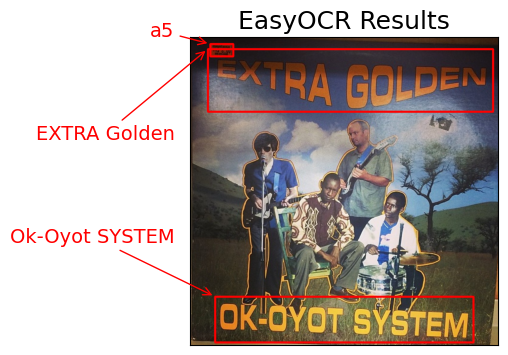

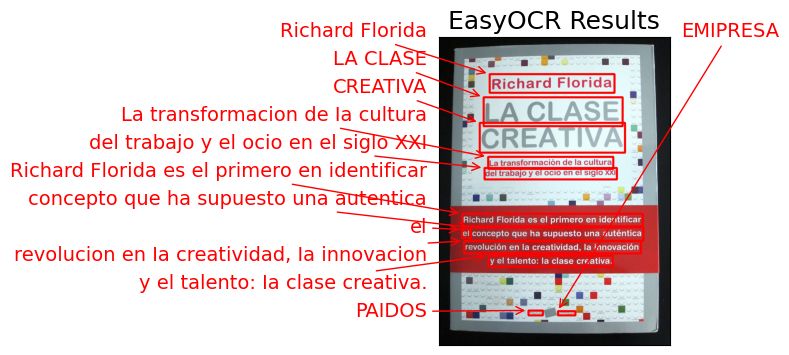

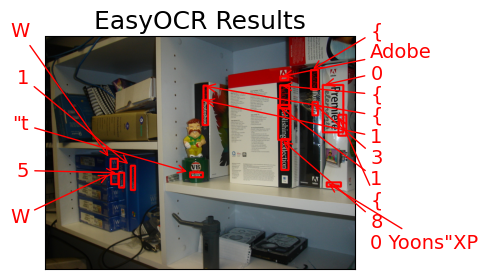

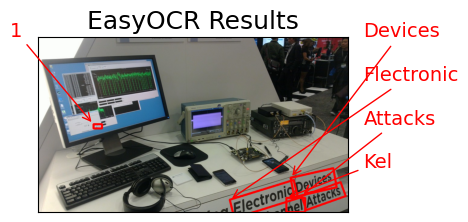

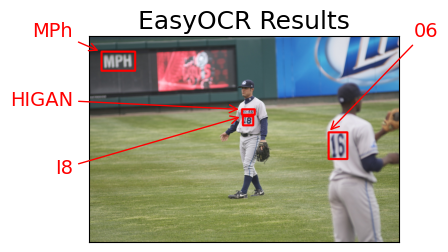

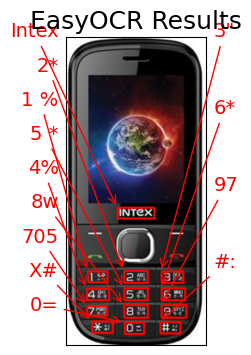

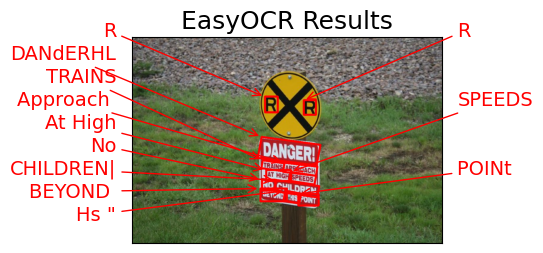

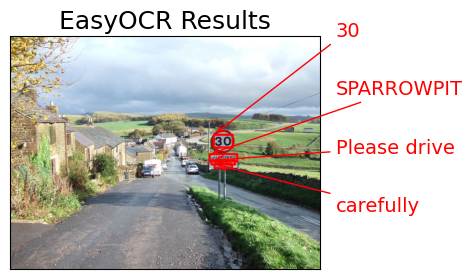

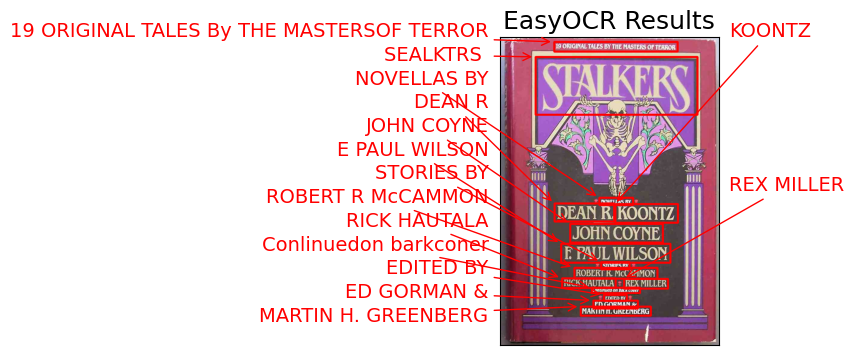

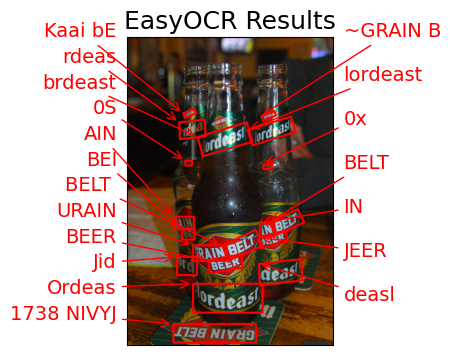

In [59]:
for img_path in images[:10]:  # Adjust the range as needed
    plot_easyocr(img_path, easyocr_df)

## Keras OCR for text extraction & recognition

In [55]:
pipeline = keras_ocr.pipeline.Pipeline()  # Keras OCR

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [56]:
# Function to process Keras OCR results
def get_kerasocr_results(image_paths):
    dfs = []
    for img in tqdm(image_paths):
        results = pipeline.recognize([img])
        img_id = img.split('/')[-1].split('.')[0]
        img_df = pd.DataFrame(results[0], columns=['text', 'bbox'])
        img_df['img_id'] = img_id
        dfs.append(img_df)
    return pd.concat(dfs)

In [57]:
# Get results for Keras OCR
kerasocr_df = get_kerasocr_results(images[:10])  # Use first few images for Keras OCR

  0%|          | 0/10 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


In [60]:
def plot_kerasocr(img_fn, kerasocr_df):
    img_id = img_fn.split('/')[-1].split('.')[0]  # Extract image ID
    fig, ax = plt.subplots(figsize=(4, 4))

    # Get KerasOCR results for the current image
    keras_results = kerasocr_df.query('img_id == @img_id')[['text', 'bbox']].values.tolist()
    keras_results = [(x[0], np.array(x[1])) for x in keras_results]

    # Visualize KerasOCR results
    keras_ocr.tools.drawAnnotations(plt.imread(img_fn), keras_results, ax=ax)
    ax.set_title('Keras OCR Results', fontsize=18)
    plt.show()

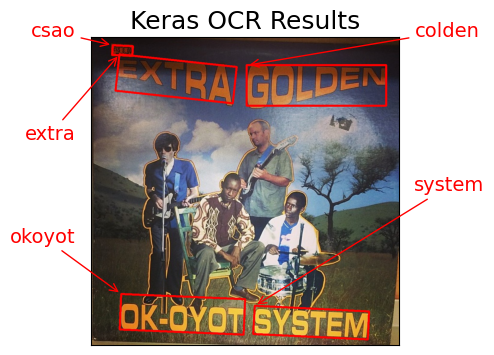

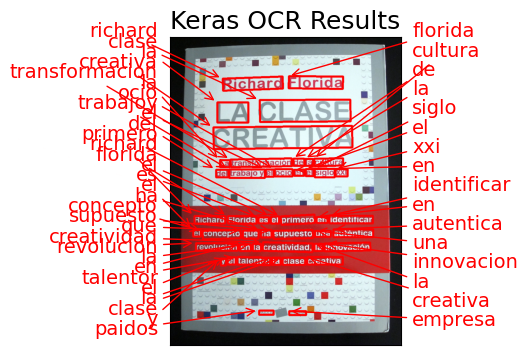

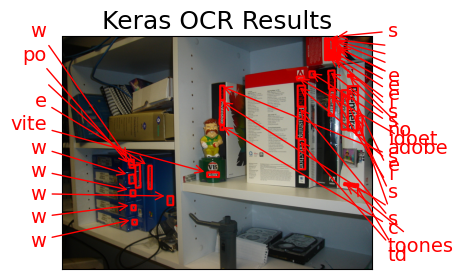

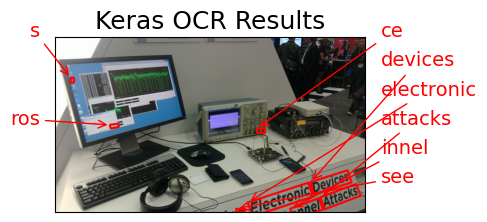

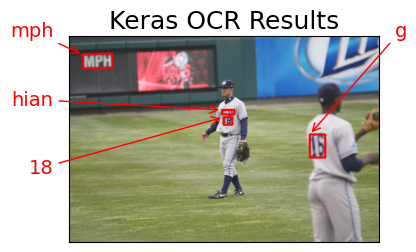

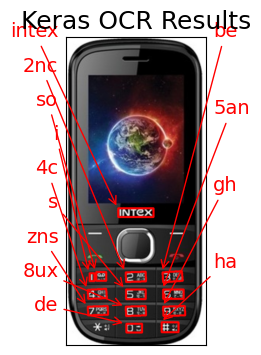

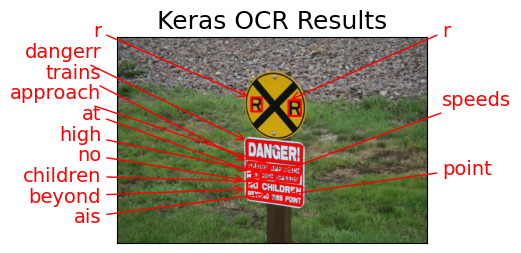

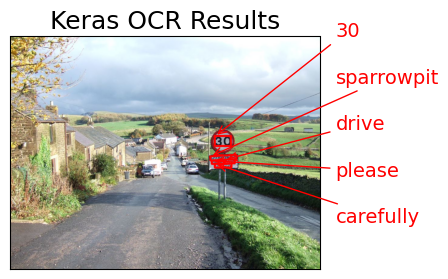

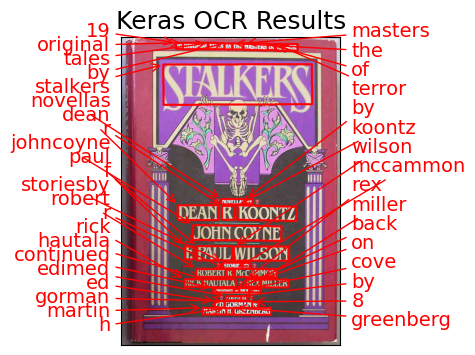

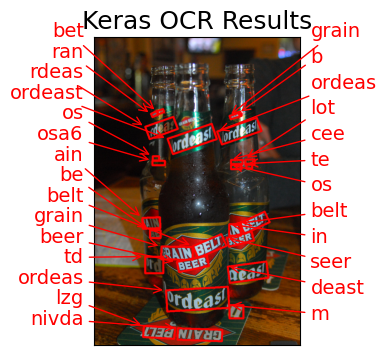

In [61]:
for img_path in images[:10]:  
    plot_kerasocr(img_path, kerasocr_df)

# Function to plot comparison between EasyOCR and Keras OCR

In [64]:
def plot_compare(img_fn, easyocr_df, kerasocr_df):
    img_id = img_fn.split('/')[-1].split('.')[0]  # Extract the image ID
    fig, axs = plt.subplots(1, 2, figsize=(10, 10))

    # EasyOCR results for the current image
    easy_results = easyocr_df.query('img_id == @img_id')[['text', 'bbox']].values.tolist()
    easy_results = [(x[0], np.array(x[1])) for x in easy_results]  # Format as (text, bbox) pairs

    # Visualize EasyOCR results
    keras_ocr.tools.drawAnnotations(plt.imread(img_fn), easy_results, ax=axs[0])
    axs[0].set_title('EasyOCR Results', fontsize=24)

    # Keras OCR results for the current image
    keras_results = kerasocr_df.query('img_id == @img_id')[['text', 'bbox']].values.tolist()
    keras_results = [(x[0], np.array(x[1])) for x in keras_results]  # Format as (text, bbox) pairs

    # Visualize Keras OCR results
    keras_ocr.tools.drawAnnotations(plt.imread(img_fn), keras_results, ax=axs[1])
    axs[1].set_title('Keras OCR Results', fontsize=24)

    # Show the comparison plot
    plt.show()

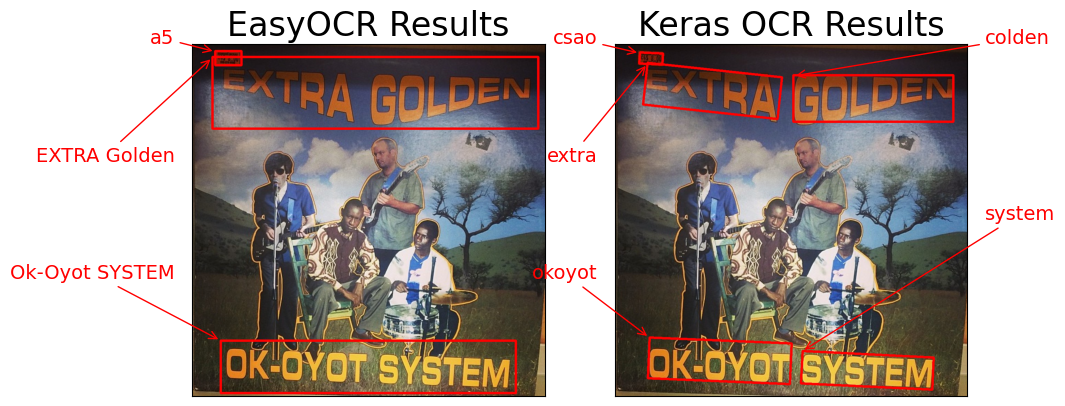

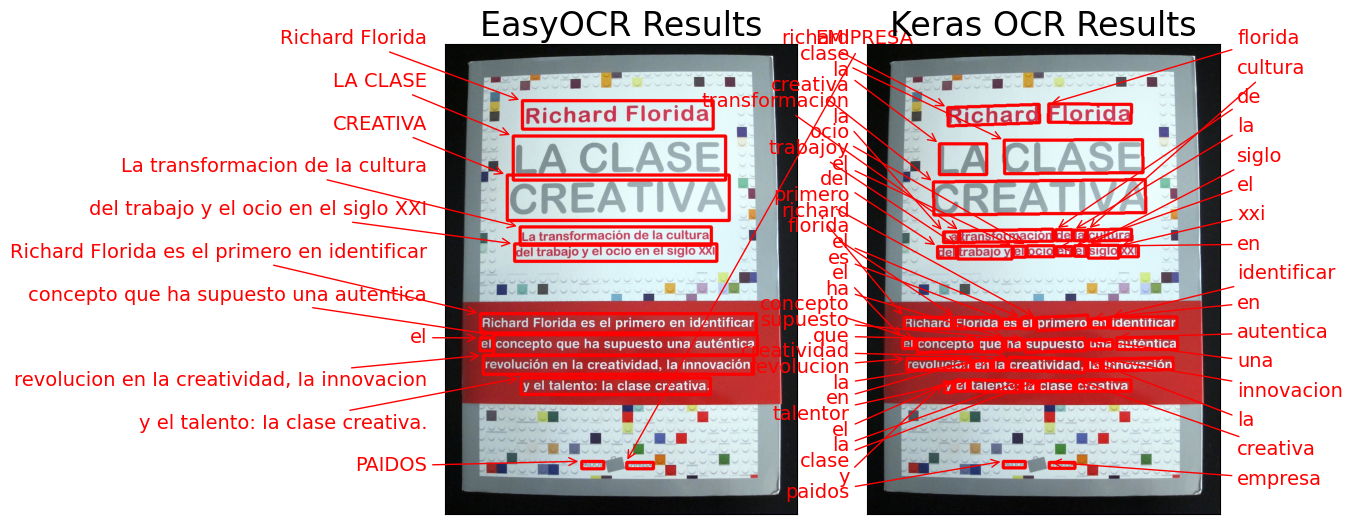

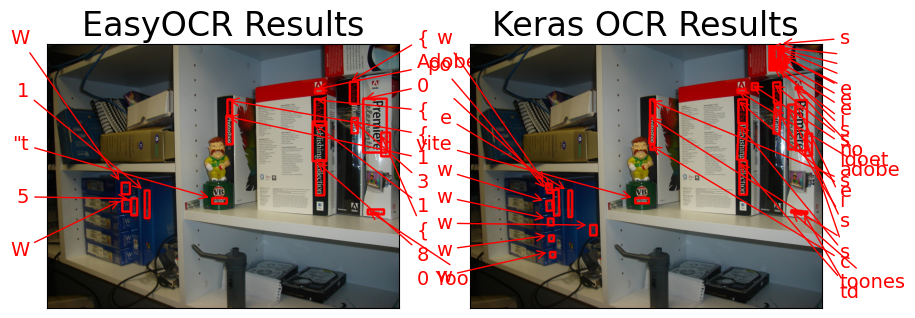

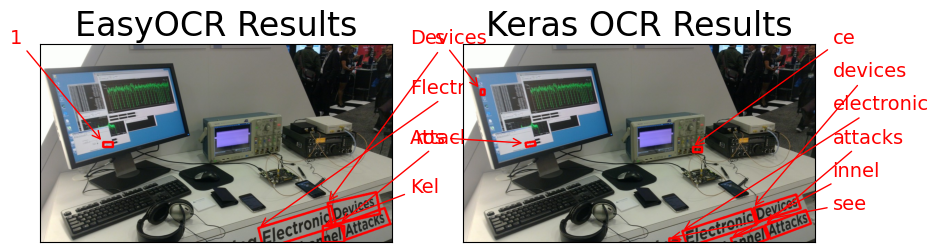

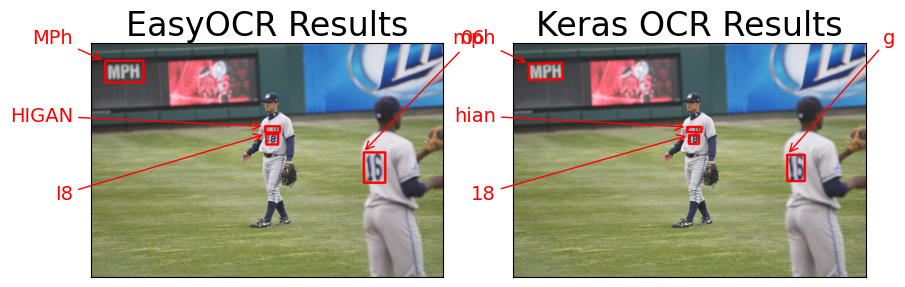

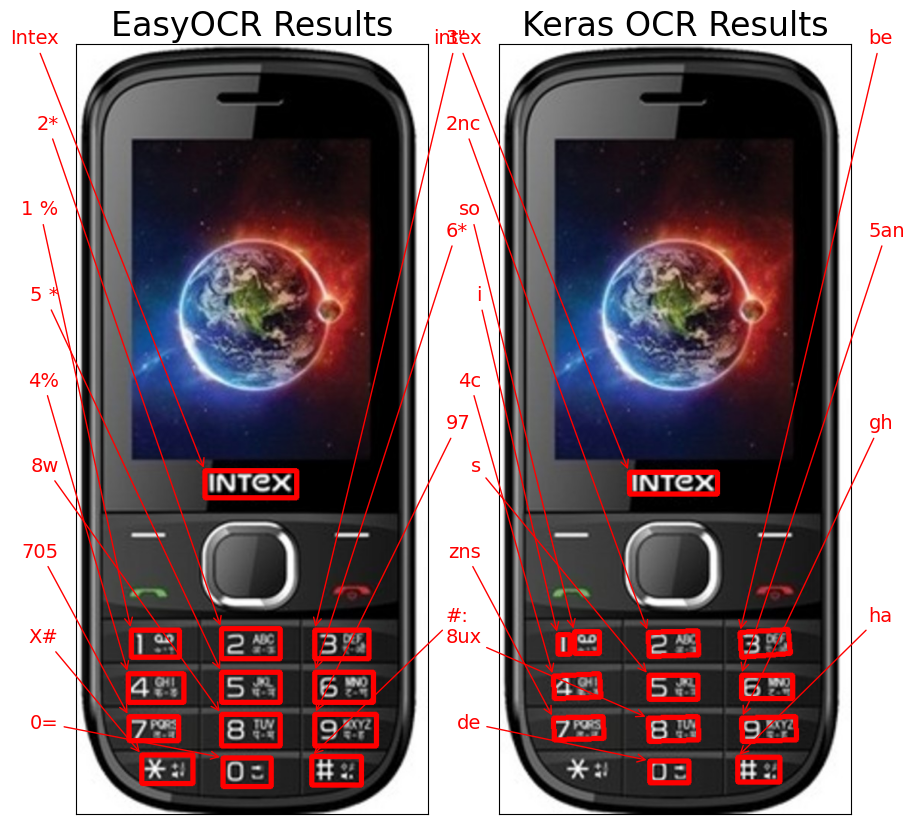

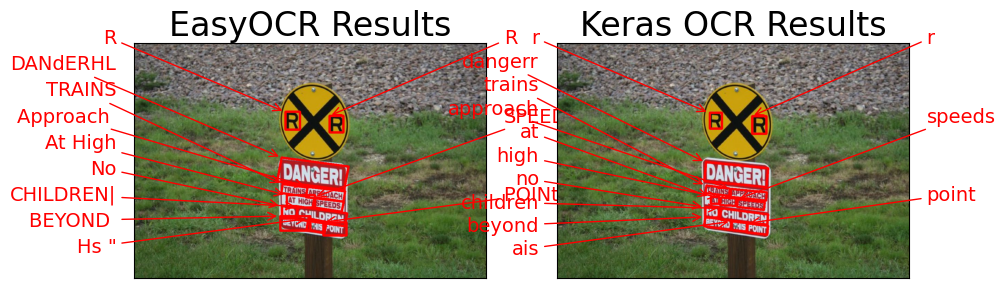

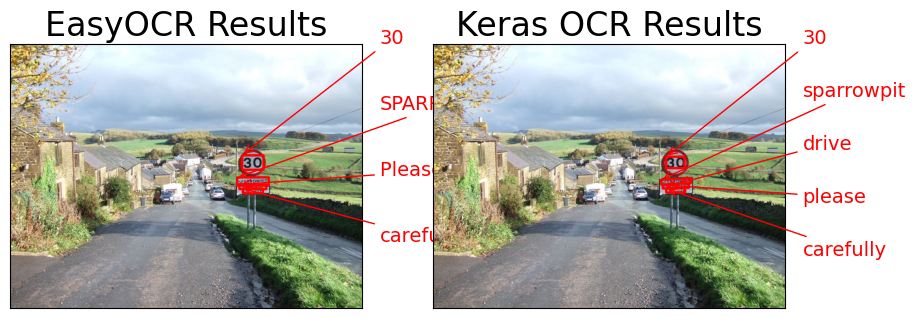

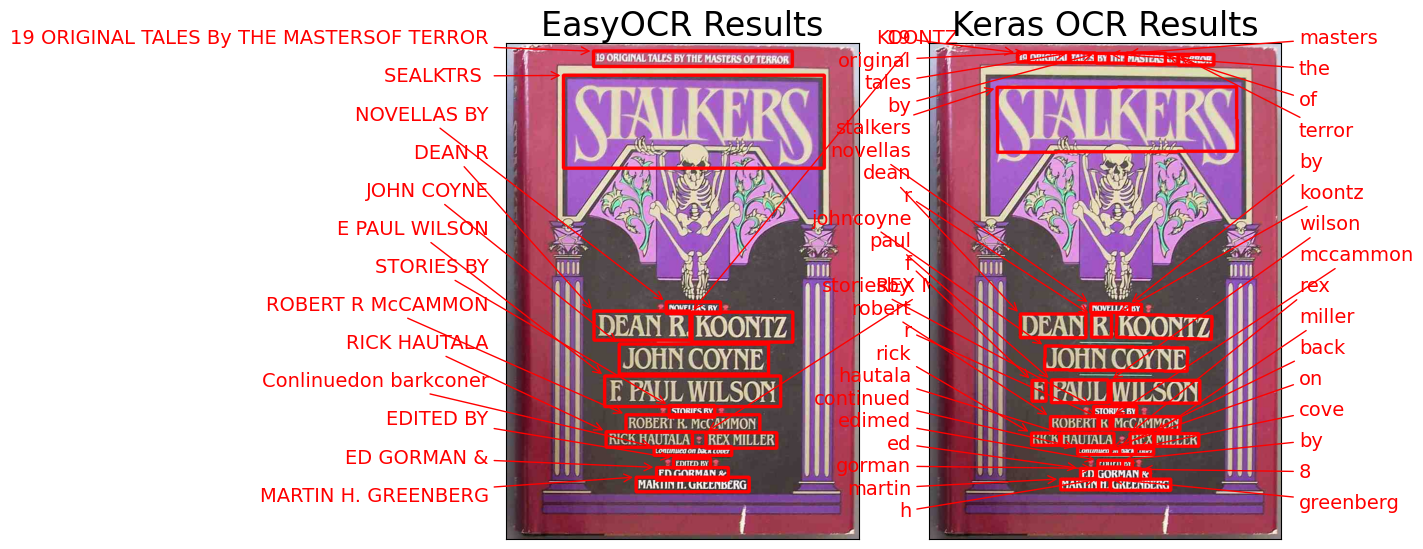

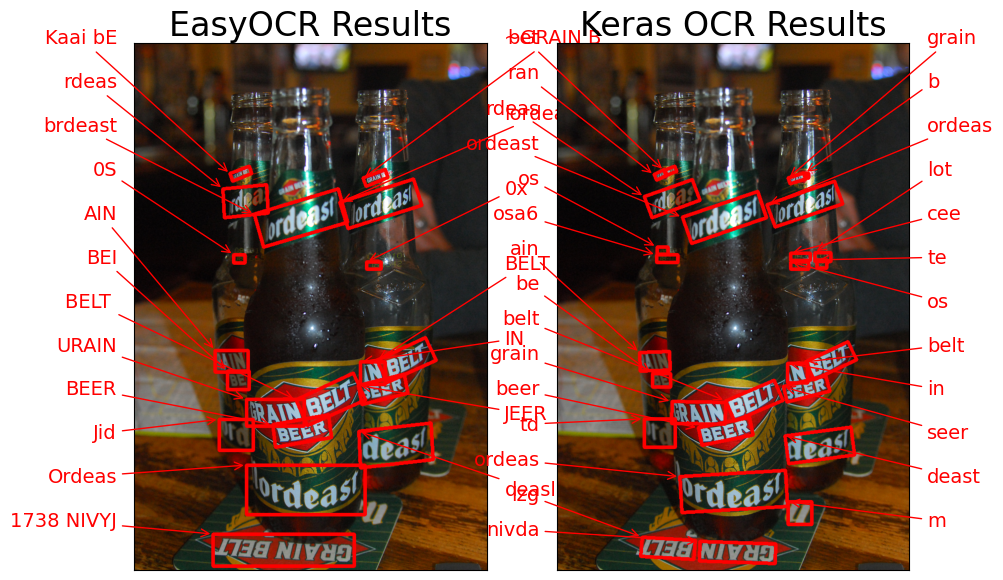

In [65]:
for img_path in images[:10]:  # Adjust the range as needed
    plot_compare(img_path, easyocr_df, kerasocr_df)